# Mounting the Google drive

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Importing the libraries used for Visulazitaion

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Importing Geopandas library and shapefile for reading .shp file

In [3]:
! pip install PyShp
import geopandas as gpd
import shapefile as shp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 1.1 MB/s eta 0:00:00


In [4]:
df =  pd.read_csv("/content/drive/MyDrive/ML_Project/Suicides_in_India.csv") # Reading the file and assigning that to df

In [5]:
df.head(10) # Head to understand the dataframe

,State,Year,Type_code,Type,Gender,Age_group
0,A & N ISLANDS,2001,Causes,Cancer,Male,15-29
1,A & N ISLANDS,2001,Causes,Divorce,Male,60+
2,A & N ISLANDS,2001,Causes,Dowry Dispute,Female,60+
3,A & N ISLANDS,2001,Causes,Ideological Causes/Hero Worshipping,Female,60+
4,A & N ISLANDS,2001,Causes,Illness (Aids/STD),Female,0-14
5,A & N ISLANDS,2001,Causes,Paralysis,Male,45-59
6,A & N ISLANDS,2001,Causes,Property Dispute,Male,0-14
7,A & N ISLANDS,2001,Causes,Suspected/Illicit Relation,Female,15-29
8,A & N ISLANDS,2001,Means_adopted,By Consuming Insecticides,Female,0-14
9,A & N ISLANDS,2001,Means_adopted,By Fire/Self Immolation,Female,30-44


In [6]:
df.tail(10)

,State,Year,Type_code,Type,Gender,Age_group
237509,WEST BENGAL,2012,Causes,Insanity/Mental Illness,Male,0-14
237510,WEST BENGAL,2012,Means_adopted,By coming under running vehicles/trains,Male,0-14
237511,WEST BENGAL,2012,Means_adopted,By touching electric wires,Female,0-14
237512,WEST BENGAL,2012,Means_adopted,By touching electric wires,Male,45-59
237513,WEST BENGAL,2012,Professional_Profile,Professional Activity,Male,15-29
237514,WEST BENGAL,2012,Professional_Profile,Professional Activity,Male,60+
237515,WEST BENGAL,2012,Professional_Profile,Self-employed (Business activity),Male,0-14
237516,WEST BENGAL,2012,Professional_Profile,Service (Government),Male,15-29
237517,WEST BENGAL,2012,Professional_Profile,Service (Government),Male,60+
237518,WEST BENGAL,2012,Social_Status,Never Married,Male,0-100+


In [7]:
df.info() # To get various information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
dtypes: int64(1), object(5)
memory usage: 10.9+ MB


In [8]:
df.describe() # To get the count and values of dataframe

,Year
count,237519.000000
mean,2006.500448
std,3.452240
min,2001.000000
25%,2004.000000
50%,2007.000000
75%,2010.000000
max,2012.000000


## The following code gives State, Gender and Age_Group of people with cancer

In [10]:
count = 1
l = []

for idx, row in df.iterrows():
  if row["Type"] == "Cancer":
    print(row["State"],row["Gender"],row["Age_group"])
    count = count + 1
count

A & N ISLANDS Male 15-29
A & N ISLANDS Male 15-29
A & N ISLANDS Female 45-59
A & N ISLANDS Female 60+
A & N ISLANDS Male 45-59
A & N ISLANDS Female 0-14
A & N ISLANDS Female 60+
A & N ISLANDS Female 45-59
A & N ISLANDS Male 0-14
A & N ISLANDS Female 45-59
A & N ISLANDS Female 45-59
A & N ISLANDS Male 30-44
A & N ISLANDS Female 15-29
A & N ISLANDS Male 60+
A & N ISLANDS Male 60+
A & N ISLANDS Male 15-29
A & N ISLANDS Female 15-29
A & N ISLANDS Male 0-14
A & N ISLANDS Female 45-59
A & N ISLANDS Male 0-14
A & N ISLANDS Male 30-44
A & N ISLANDS Female 0-14
A & N ISLANDS Male 45-59
A & N ISLANDS Male 60+
A & N ISLANDS Male 30-44
A & N ISLANDS Female 0-14
A & N ISLANDS Male 45-59
A & N ISLANDS Female 15-29
A & N ISLANDS Male 0-14
A & N ISLANDS Female 15-29
A & N ISLANDS Female 30-44
A & N ISLANDS Male 45-59
A & N ISLANDS Female 30-44
A & N ISLANDS Female 30-44
A & N ISLANDS Female 60+
A & N ISLANDS Female 60+
A & N ISLANDS Female 30-44
A & N ISLANDS Female 30-44
A & N ISLANDS Female 0-14
A &

4201

## df_count gives us the total no of people doing sucide in each state

In [11]:
df_count = df['State'].value_counts()
df_count

MADHYA PRADESH       6792
MAHARASHTRA          6792
KARNATAKA            6792
ODISHA               6791
ANDHRA PRADESH       6791
RAJASTHAN            6791
BIHAR                6790
CHHATTISGARH         6790
HARYANA              6790
KERALA               6788
UTTAR PRADESH        6787
ASSAM                6786
TAMIL NADU           6786
GUJARAT              6786
JHARKHAND            6785
TRIPURA              6782
DELHI (UT)           6782
WEST BENGAL          6780
PUNJAB               6779
HIMACHAL PRADESH     6774
JAMMU & KASHMIR      6761
GOA                  6759
UTTARAKHAND          6758
SIKKIM               6742
MIZORAM              6737
MEGHALAYA            6733
PUDUCHERRY           6730
CHANDIGARH           6717
A & N ISLANDS        6712
DAMAN & DIU          6710
ARUNACHAL PRADESH    6707
NAGALAND             6705
D & N HAVELI         6704
MANIPUR              6700
LAKSHADWEEP          6674
TOTAL (ALL INDIA)     312
TOTAL (STATES)        312
TOTAL (UTs)           312
Name: State,

In [12]:
df_gen = []
labels = ["Male", "Female"]
df_copy = df.copy()

In [ ]:
count = 0
for index, rows in df_copy.iterrows():
  if 'Male' in rows['Gender']:
    count = count + 1
    df_copy.drop([index], inplace = True, axis = 0)
print(count)
df_gen.append(count)

In [ ]:
count = 0
for index, rows in df_copy.iterrows():
  if 'Female' in rows['Gender']:
    count = count + 1
    df_copy.drop([index], inplace = True, axis = 0)
print(count)
df_gen.append(count)

In [13]:
df_gen.append(118879)
df_gen.append(118640)

## This pie chart shows the Gender Distribuation of people doing sucide

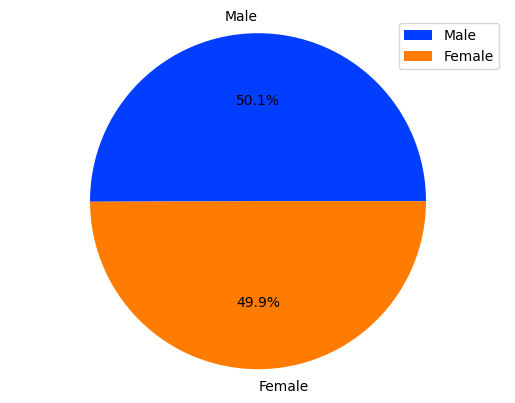

In [14]:
pallate_colour = sns.color_palette('bright')
plt.pie(df_gen, labels = labels, colors = pallate_colour, autopct = '%1.1f%%')
plt.axis('equal')
plt.legend()
plt.show()

## The Boxplot below gives us the distributation  of year having maxmium Sucides




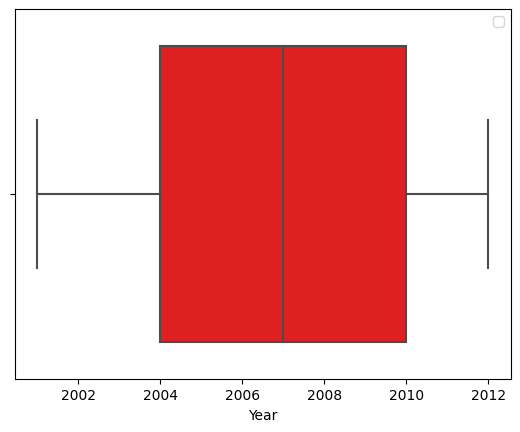

In [ ]:
sns.boxplot(data = df, x = df["Year"], color = 'red')
plt.legend()

## This Plot gives the number of people died by various cause

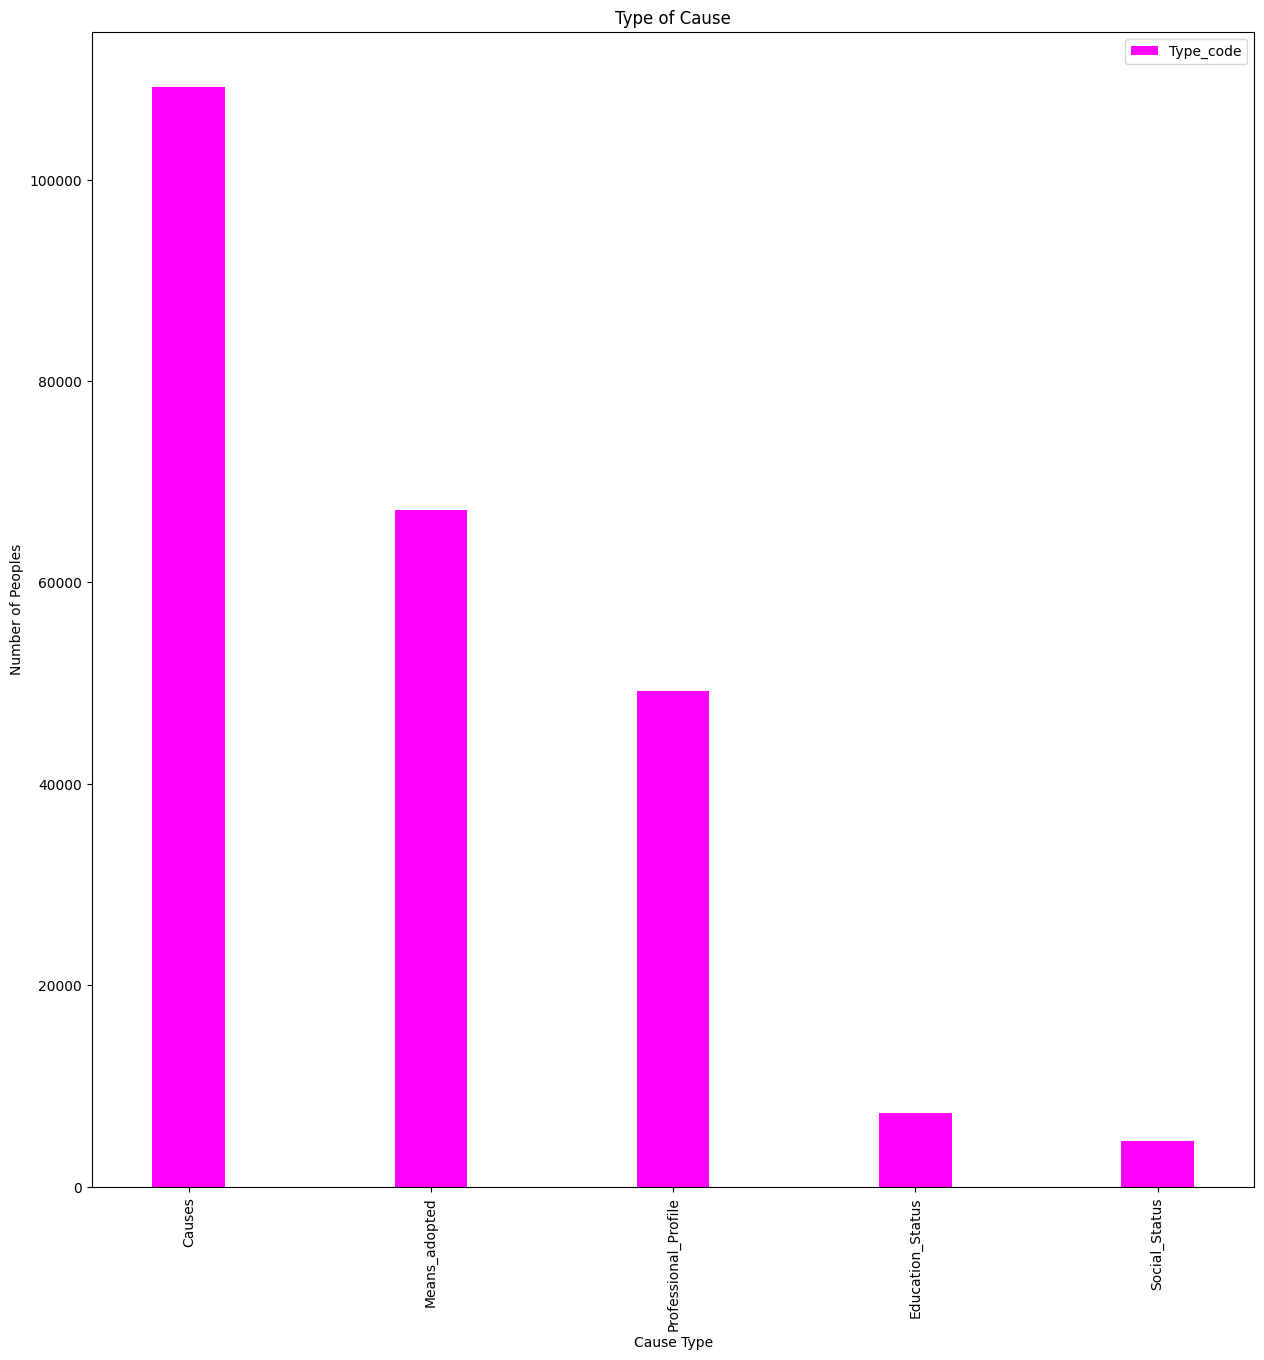

In [15]:
df['Type_code'].value_counts(normalize =  False)
df['Type_code'].value_counts().plot.bar(figsize = (15,15),width = 0.3, color = 'magenta')
plt.title('Type of Cause')
plt.xlabel('Cause Type')
plt.ylabel('Number of Peoples')
plt.legend()
plt.show()

## The Plot below shows diffrent Age Group of people died

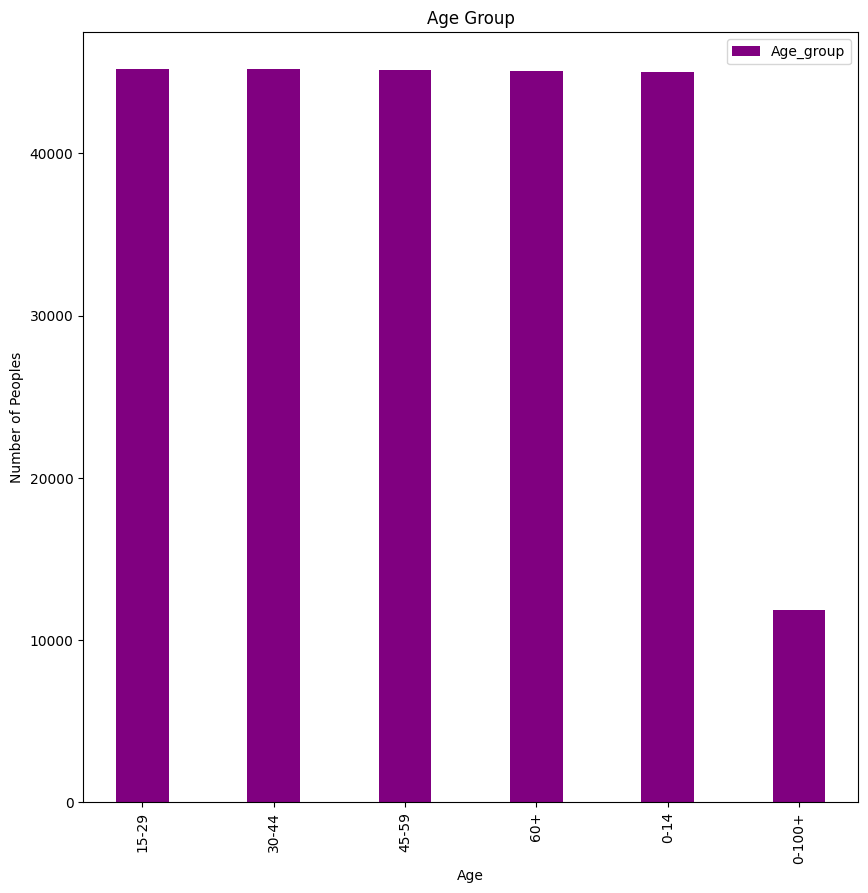

In [ ]:
df['Age_group'].value_counts(normalize =  False)
df['Age_group'].value_counts().plot.bar(figsize = (10,10), width = 0.4, color = 'purple')
plt.title('Age Group')
plt.xlabel('Age')
plt.ylabel('Number of Peoples')
plt.legend()
plt.show()

## Plottting no of Sucides across states in India using Geopandas

In [ ]:
df_copy = df.copy()
df_copy['State'].str.lower()

0         a & n islands
1         a & n islands
2         a & n islands
3         a & n islands
4         a & n islands
              ...      
237514      west bengal
237515      west bengal
237516      west bengal
237517      west bengal
237518      west bengal
Name: State, Length: 237519, dtype: object

In [ ]:
df_copy['State'] = df_copy['State'].str.title()

In [ ]:
df_copy = df_copy[df_copy.State != 'Total (All India)']
df_copy = df_copy[df_copy.State != 'Total (States)']

In [ ]:
df_copy.replace(to_replace = "A & N Islands",
                value = "Andaman and Nicobar Islands", inplace = True)
df_copy.replace(to_replace = "D & N Haveli",
                value = "Dadra and Nagar Haveli", inplace = True)
df_copy.replace(to_replace = "Daman & Diu",
                value = "Daman and Diu", inplace = True)
df_copy.replace(to_replace = "Jammu & Kashmir",
                value = "Jammu and Kashmir", inplace = True)
df_copy.replace(to_replace = "Delhi (Ut)",
                value = "Delhi", inplace = True)
df_copy.replace(to_replace = "Total (Uts)",
                value = "Ladakh")

,State,Year,Type_code,Type,Gender,Age_group
0,Andaman and Nicobar Islands,2001,Causes,Cancer,Male,15-29
1,Andaman and Nicobar Islands,2001,Causes,Divorce,Male,60+
2,Andaman and Nicobar Islands,2001,Causes,Dowry Dispute,Female,60+
3,Andaman and Nicobar Islands,2001,Causes,Ideological Causes/Hero Worshipping,Female,60+
4,Andaman and Nicobar Islands,2001,Causes,Illness (Aids/STD),Female,0-14
...,...,...,...,...,...,...
237514,West Bengal,2012,Professional_Profile,Professional Activity,Male,60+
237515,West Bengal,2012,Professional_Profile,Self-employed (Business activity),Male,0-14
237516,West Bengal,2012,Professional_Profile,Service (Government),Male,15-29
237517,West Bengal,2012,Professional_Profile,Service (Government),Male,60+


In [ ]:
df_map = df_copy['State'].value_counts().reset_index()
df_map.columns = ['State', 'Counts']

In [ ]:
shp = gpd.read_file(r'/content/drive/MyDrive/Maps_with_python/india-polygon.shp')
shp = shp[["st_nm", "geometry"]]
shp = pd.merge(
    left = shp,
    right = df_map,
    left_on = 'st_nm',
    right_on = 'State',
    how = 'left'
)


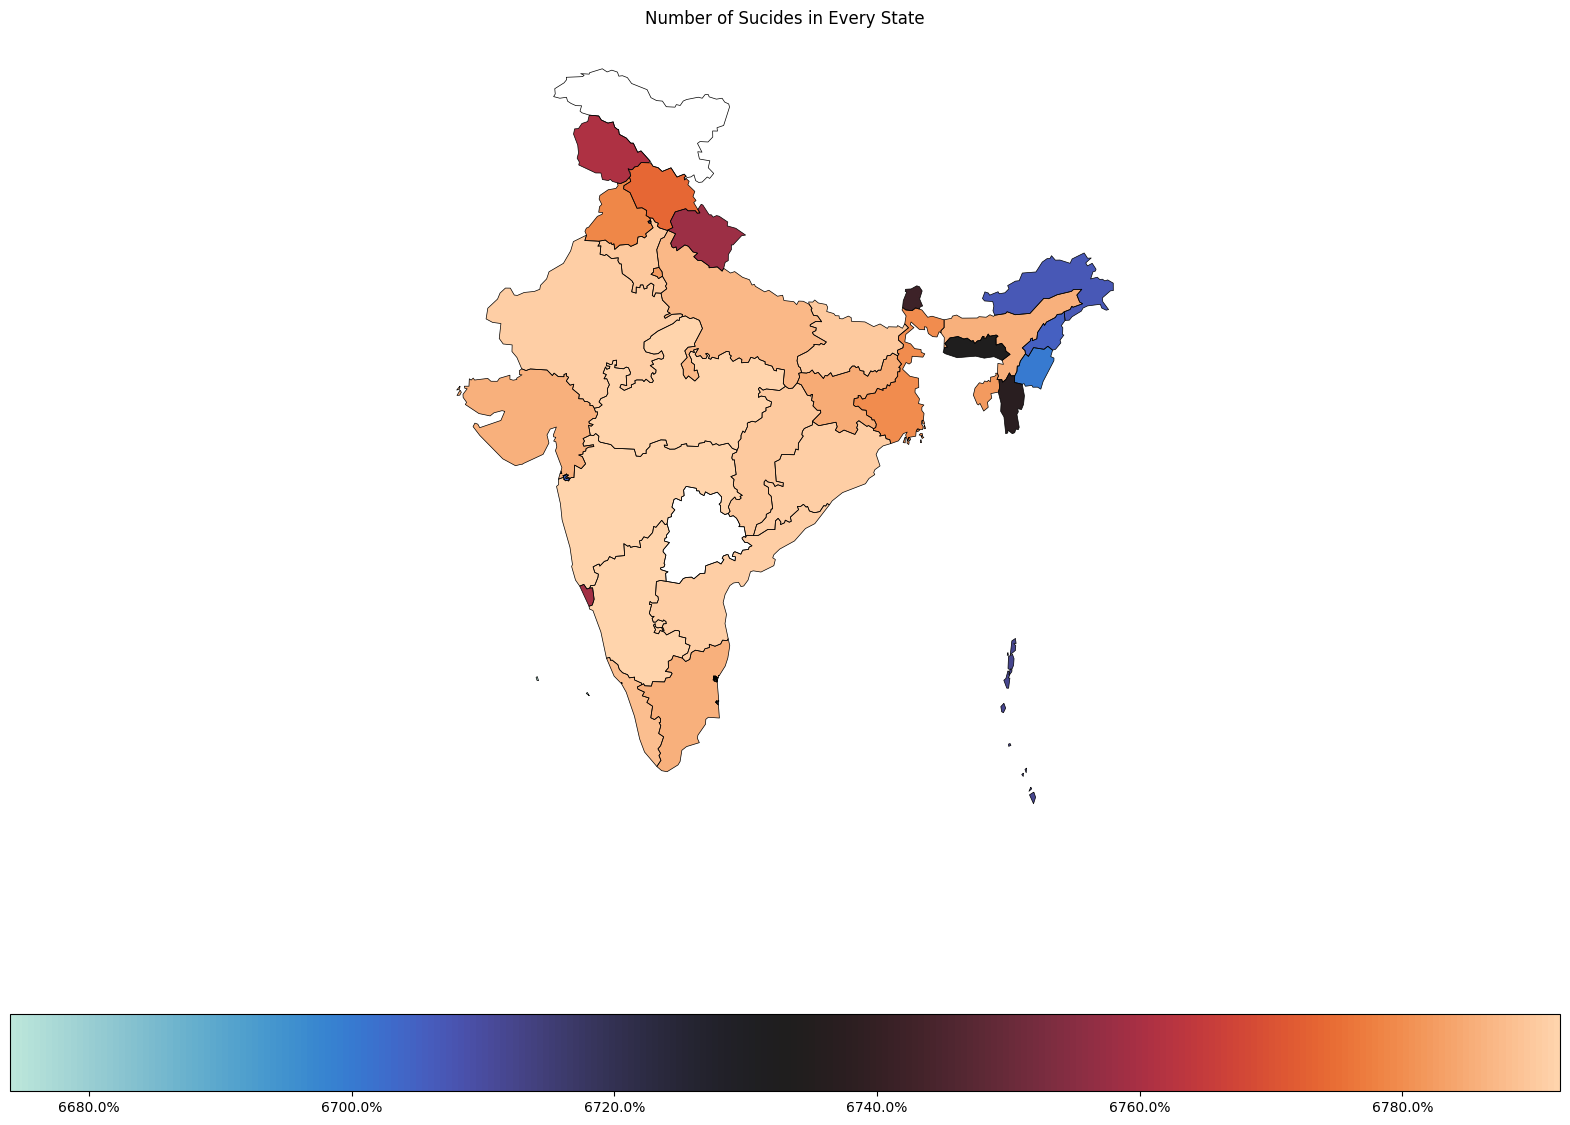

In [ ]:
ax = shp.boundary.plot(edgecolor = 'black', linewidth = 0.5, figsize=(20,15))
shp.plot(ax=ax, column='Counts', legend = True, cmap = 'icefire', legend_kwds ={'orientation':'horizontal','format':'%.1f%%'})

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

for edge in ['right', 'bottom', 'top', 'left']:
  ax.spines[edge].set_visible(False)

ax.set_title("Number of Sucides in Every State")
plt.show()